# NumPy Basics: Arrays and Vectorized Computation

In [1]:
import numpy as np

NumPy, short for Numerical Python, is one of the most important foundational packages for numerical computing in Python. Most computational packages providing scientific functionality use NumPy’s array objects as the lingua franca for data exchange.

Here are some of the things you’ll find in NumPy:

- ndarray, an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities.

- Mathematical functions for fast operations on entire arrays of data without having to write loops.

- Tools for reading/writing array data to disk and working with memory-mapped files.

- Linear algebra, random number generation, and Fourier transform capabilities.

- A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.

Because NumPy provides an easy-to-use C API, it is straightforward to pass data to external libraries written in a low-level language and also for external libraries to return data to Python as NumPy arrays. This feature has made Python a language of choice for wrapping legacy C/C++/Fortran codebases and giving them a dynamic and easy-to-use interface.

While NumPy by itself does not provide modeling or scientific functionality, having an understanding of NumPy arrays and array-oriented computing will help you use tools with array-oriented semantics, like pandas, much more effectively. Since NumPy is a large topic, I will cover many advanced NumPy features like broadcasting in more depth later (see Appendix A).

For most data analysis applications, the main areas of functionality I’ll focus on are:

- Fast vectorized array operations for data munging and cleaning, subsetting and filtering, transformation, and any other kinds of computations

- Common array algorithms like sorting, unique, and set operations

- Efficient descriptive statistics and aggregating/summarizing data

- Data alignment and relational data manipulations for merging and joining together heterogeneous datasets

- Expressing conditional logic as array expressions instead of loops with if-elif-else branches

- Group-wise data manipulations (aggregation, transformation, function application)

While NumPy provides a computational foundation for general numerical data processing, many readers will want to use pandas as the basis for most kinds of statistics or analytics, especially on tabular data. pandas also provides some more domain-specific functionality like time series manipulation, which is not present in NumPy.

One of the reasons NumPy is so important for numerical computations in Python is because it is designed for efficiency on large arrays of data. There are a number of reasons for this:

- NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects. NumPy’s library of algorithms written in the C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences.

- NumPy operations perform complex computations on entire arrays without the need for Python for loops.

To give you an idea of the performance difference, consider a NumPy array of one million integers, and the equivalent Python list, multiply each one by 2. NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

In [2]:
my_arr = np.arange(1000000)

my_list = list(range(1000000))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 12.3 ms, sys: 8.34 ms, total: 20.6 ms
Wall time: 19.5 ms


In [4]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 546 ms, sys: 160 ms, total: 706 ms
Wall time: 714 ms


## 1. The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements.

To give you a flavor of how NumPy enables batch computations with similar syntax to scalar values on built-in Python objects, I first import NumPy and generate a small array of random data:

In [5]:
data = np.random.randn(2, 3)

In [6]:
data

array([[ 0.34818059,  0.29939344,  2.41733428],
       [ 1.09027721, -0.74859603,  0.42993007]])

I then write mathematical operations with data:

In [7]:
data * data

array([[0.12122972, 0.08963643, 5.84350503],
       [1.18870439, 0.56039602, 0.18483987]])

In [8]:
data + data

array([[ 0.69636118,  0.59878688,  4.83466856],
       [ 2.18055441, -1.49719206,  0.85986014]])

In the first example, all of the elements have been multiplied by 10. In the second, the corresponding values in each “cell” in the array have been added to each other.

> **Note:** *In this chapter and throughout the book, I use the standard NumPy convention of always using import numpy as np. You are, of course, welcome to put from numpy import * in your code to avoid having to write np., but I advise against making a habit of this. The numpy namespace is large and contains a number of functions whose names conflict with built-in Python functions (like min and max).*

An ndarray is a generic multidimensional container for homogeneous data; that is, **all of the elements must be the same type**. Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array:

In [9]:
data.shape

(2, 3)

In [10]:
data.dtype

dtype('float64')

This chapter will introduce you to the basics of using NumPy arrays, and should be sufficient for following along with the rest of the book. While it’s not necessary to have a deep understanding of NumPy for many data analytical applications, becoming proficient in array-oriented programming and thinking is a key step along the way to becoming a scientific Python guru.

> **Note:** *Whenever you see “array,” “NumPy array,” or “ndarray” in the text, with few exceptions they all refer to the same thing: the ndarray object.*

### Creating ndarrays

The easiest way to create an array is to use the array function. This accepts any sequence-like object (including other arrays) and produces a new NumPy array containing the passed data. For example, a list is a good candidate for conversion:

In [11]:
data1 = [6, 7.5, 8, 0, 1]

In [12]:
arr1 = np.array(data1)

In [13]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array:

In [14]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [15]:
arr2 = np.array(data2)

In [16]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions with shape inferred from the data. We can confirm this by inspecting the ndim and shape attributes:

In [17]:
arr2.ndim

2

In [18]:
arr2.shape

(2, 4)

Unless explicitly specified (more on this later), np.array tries to infer a good data type for the array that it creates. The data type is stored in a special dtype metadata object; for example, in the previous two examples we have:

In [19]:
arr1.dtype

dtype('float64')

In [20]:
arr2.dtype

dtype('int64')

In addition to np.array, there are a number of other functions for creating new arrays. As examples, zeros and ones create arrays of 0s or 1s, respectively, with a given length or shape. empty creates an array without initializing its values to any particular value. To create a higher dimensional array with these methods, pass a tuple for the shape:

In [21]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [23]:
np.empty((2, 3, 2))

array([[[-2.68156159e+154, -2.68156159e+154],
        [ 3.95252517e-323,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000]],

       [[ 0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000]]])

> **Caution:** *It’s not safe to assume that np.empty will return an array of all zeros. In some cases, it may return uninitialized “garbage” values.*

> `arange` is an array-valued version of the built-in Python range function:

In [24]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Since NumPy is focused on numerical computing, the data type, if not specified, will in many cases be float64 (floating point).

| Function | Description |
| :----------- | :----------- |
| `array` | Convert input data (list, tuple, array, or other sequence type) to an `ndarray` either by inferring a dtype or explicitly specifying a dtype; copies the input data by default |
| `asarray` | Convert input to ndarray, but do not copy if the input is already an ndarray |
| `arange` | Like the built-in `range` but returns an ndarray instead of a list |
| `ones, ones_like` | Produce an array of all 1s with the given shape and dtype; `ones_like` takes another array and produces a ones array of the same shape and dtype |
| `zeros, zeros_like` | Like `ones` and `ones_like` but producing arrays of 0s instead |
| `empty, empty_like` | Create new arrays by allocating new memory, but do not populate with any values like ones and zeros |
| `full, full_like` | Produce an array of the given shape and dtype with all values set to the indicated “fill value” `full_like` takes another array and produces a filled array of the same shape and dtype |
| `eye, identity` | Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere) |

### Data Types for ndarrays

The data type or dtype is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data:

In [25]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [26]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [27]:
arr1.dtype

dtype('float64')

In [28]:
arr2.dtype

dtype('int32')

dtypes are a source of NumPy’s flexibility for interacting with data coming from other systems. In most cases they provide a mapping directly onto an underlying disk or memory representation, which makes it easy to read and write binary streams of data to disk and also to connect to code written in a low-level language like C or Fortran. The numerical dtypes are named the same way: a type name, like float or int, followed by a number indicating the number of bits per element. A standard double-precision floating-point value (what’s used under the hood in Python’s float object) takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as float64. See Table 4-2 for a full listing of NumPy’s supported data types.

> **Note:** *Don’t worry about memorizing the NumPy dtypes, especially if you’re a new user. It’s often only necessary to care about the general kind of data you’re dealing with, whether floating point, complex, integer, boolean, string, or general Python object. When you need more control over how data are stored in memory and on disk, especially large datasets, it is good to know that you have control over the storage type.*

| Type | Type Code | Description |
| :--- | :--- | :----------- |
| `int8, uint8` | `i1, u1` | Signed and unsigned 8-bit (1 byte) integer types |
| `int16, uint16` | `i2, u2` | Signed and unsigned 16-bit integer types |
| `int32, uint32` | `i4, u4` | Signed and unsigned 32-bit integer types |
| `int64, uint64` | `i8, u8` | Signed and unsigned 64-bit integer types |
| `float16` | `f2` | Half-precision floating point |
| `float32` | `f4 or f` | Standard single-precision floating point; compatible with C float |
| `float64` | `f8 or d` | Standard double-precision floating point; compatible with C double and Python float object |
| `float128` | `f16 or g` | Extended-precision floating point |
| `complex64, complex128, complex256` | `c8, c16, c32` | Complex numbers represented by two 32, 64, or 128 floats, respectively |
| `bool` | `?` | Boolean type storing True and False values |
| `object` | `O` | Python object type; a value can be any Python object |
| `string_` | `S` | Fixed-length ASCII string type (1 byte per character); for example, to create a string dtype with length 10, use 'S10' |
| `unicode_` | `U` | Fixed-length Unicode type (number of bytes platform specific); same specification semantics as string_ (e.g., 'U10') |

You can explicitly convert or cast an array from one dtype to another using ndarray’s `astype` method:

In [29]:
arr = np.array([1, 2, 3, 4, 5])

In [30]:
arr.dtype

dtype('int64')

In [31]:
float_arr = arr.astype(np.float64)

In [32]:
float_arr.dtype

dtype('float64')

In this example, integers were cast to floating point. If I cast some floating-point numbers to be of integer dtype, the decimal part will be truncated:

In [33]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [34]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [35]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [36]:
arr.dtype

dtype('float64')

If you have an array of strings representing numbers, you can use astype to convert them to numeric form:

In [37]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [38]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

> **Caution:** *It’s important to be cautious when using the numpy.string_ type, as string data in NumPy is fixed size and may truncate input without warning. pandas has more intuitive out-of-the-box behavior on non-numeric data.*

If casting were to fail for some reason (like a string that cannot be converted to float64), a `ValueError` will be raised. Here I was a bit lazy and wrote float instead of np.float64; NumPy aliases the Python types to its own equivalent data dtypes.

You can also use another array’s dtype attribute:

In [39]:
int_array = np.arange(10)

In [40]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [41]:
calibers.dtype

dtype('float64')

In [42]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [43]:
int_array.dtype

dtype('int64')

There are shorthand type code strings you can also use to refer to a dtype:

In [44]:
empty_uint32 = np.empty(8, dtype='u4')

In [45]:
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

> **Note:** *Calling `astype` always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype.*

### Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data without writing any for loops. NumPy users call this vectorization. Any arithmetic operations between equal-size arrays applies the operation element-wise:

In [46]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [47]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [48]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [49]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [50]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [51]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparisons between arrays of the same size yield boolean arrays:

In [52]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [53]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [54]:
arr2 < arr

array([[ True, False,  True],
       [False,  True, False]])

Evaluating operations between differently sized arrays is called broadcasting and will be discussed in more detail later.

### Basic Indexing and Slicing

NumPy array indexing is a rich topic, as there are many ways you may want to select a subset of your data or individual elements. One-dimensional arrays are simple; on the surface they act similarly to Python lists:

In [55]:
arr = np.arange(10)

In [56]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
arr[2]

2

In [58]:
arr[5:8]

array([5, 6, 7])

In [59]:
arr[5:8] = 12

In [60]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

As you can see, if you assign a scalar value to a slice, as in `arr[5:8] = 12`, the value is propagated (or broadcasted henceforth) to the entire selection. An important first distinction from Python’s built-in lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array.

Example:

In [61]:
arr_slice = arr[5:8]

In [62]:
arr_slice

array([12, 12, 12])

In [63]:
arr_slice[1] = 1263

In [64]:
arr

array([   0,    1,    2,    3,    4,   12, 1263,   12,    8,    9])

The “bare” slice [:] will assign to all values in an array:

In [65]:
arr_slice[:] = 64

In [66]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you are new to NumPy, you might be surprised by this, especially if you have used other array programming languages that copy data more eagerly. As NumPy has been designed to be able to work with very large arrays, you could imagine performance and memory problems if NumPy insisted on always copying data.

> **Caution:** *If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, `arr[5:8].copy()`.*

With higher dimensional arrays, you have many more options. In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:

In [67]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [68]:
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively. But that is a bit too much work, so you can pass a comma-separated list of indices to select individual elements. So these are equivalent:

In [69]:
arr2d[0][2]

3

In [70]:
arr2d[0,2]

3

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions. So in the 2 × 2 × 3 array arr3d:

In [71]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [72]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [73]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to `arr3d[0]`:

In [74]:
old_values = arr3d[0].copy()

In [75]:
arr3d[0] = 42

In [76]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [77]:
arr3d[0] = old_values

In [78]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, `arr3d[1, 0]` gives you all of the values whose indices start with (1, 0), forming a 1-dimensional array:

In [79]:
arr3d[1, 0]

array([7, 8, 9])

Note that in all of these cases where subsections of the array have been selected, the returned arrays are views.

### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced with the familiar syntax:

In [80]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [81]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [82]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [83]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

As you can see, it has sliced along axis 0, the first axis. A slice, therefore, selects a range of elements along an axis. It can be helpful to read the expression `arr2d[:2]` as “select the first two rows of arr2d.”

You can pass multiple slices just like you can pass multiple indexes:

In [84]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number of dimensions. By mixing integer indexes and slices, you get lower dimensional slices.

For example, I can select the second row but only the first two columns like so:

In [85]:
arr2d[1, :2]

array([4, 5])

Similarly, I can select the third column but only the first two rows like so:

In [86]:
arr2d[:2, 2]

array([3, 6])

Note that a colon by itself means to take the entire axis, so you can slice only higher dimensional axes by doing:

In [87]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Of course, assigning to a slice expression assigns to the whole selection:

In [88]:
arr2d[:2, 1:] = 0

In [89]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

Let’s consider an example where we have some data in an array and an array of names with duplicates. I’m going to use here the randn function in numpy.random to generate some random normally distributed data:

In [90]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [91]:
data = np.random.randn(7, 4)

In [92]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [93]:
data

array([[-1.45489791,  0.80591263,  0.38181253,  0.4856409 ],
       [-2.64957088, -2.27348626, -0.45788116, -0.27401364],
       [-1.63551929,  0.74900397,  0.15936634,  0.57395675],
       [ 0.78114165, -1.00505532, -0.10380201, -0.07010462],
       [ 1.12672322, -1.14508884, -0.04113214,  0.12629927],
       [-1.02659587, -0.54060004,  0.28884352,  0.49942714],
       [-0.15456864, -0.33326624, -0.45515781, -0.53412624]])

Suppose each name corresponds to a row in the data array and we wanted to select all the rows with corresponding name 'Bob'. Like arithmetic operations, comparisons (such as ==) with arrays are also vectorized. Thus, comparing names with the string 'Bob' yields a boolean array:

In [94]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

The boolean array must be of the same length as the array axis it’s indexing. You can even mix and match boolean arrays with slices or integers (or sequences of integers; more on this later).

In these examples, I select from the rows where names == 'Bob' and index the columns, too:

In [95]:
data[names == 'Bob']

array([[-1.45489791,  0.80591263,  0.38181253,  0.4856409 ],
       [ 0.78114165, -1.00505532, -0.10380201, -0.07010462]])

In [96]:
data[names == 'Bob', 2:]

array([[ 0.38181253,  0.4856409 ],
       [-0.10380201, -0.07010462]])

In [97]:
data[names == 'Bob', 3]

array([ 0.4856409 , -0.07010462])

To select everything but 'Bob', you can either use != or negate the condition using ~:

In [98]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [99]:
data[~(names == 'Bob')]

array([[-2.64957088, -2.27348626, -0.45788116, -0.27401364],
       [-1.63551929,  0.74900397,  0.15936634,  0.57395675],
       [ 1.12672322, -1.14508884, -0.04113214,  0.12629927],
       [-1.02659587, -0.54060004,  0.28884352,  0.49942714],
       [-0.15456864, -0.33326624, -0.45515781, -0.53412624]])

The ~ operator can be useful when you want to invert a general condition

In [100]:
cond = names == 'Bob'

In [101]:
data[~cond]

array([[-2.64957088, -2.27348626, -0.45788116, -0.27401364],
       [-1.63551929,  0.74900397,  0.15936634,  0.57395675],
       [ 1.12672322, -1.14508884, -0.04113214,  0.12629927],
       [-1.02659587, -0.54060004,  0.28884352,  0.49942714],
       [-0.15456864, -0.33326624, -0.45515781, -0.53412624]])

Selecting two of the three names to combine multiple boolean conditions, use boolean arithmetic operators like & (and) and | (or):

In [102]:
mask = (names == 'Bob') | (names == 'Will')

In [103]:
mask

array([ True, False,  True,  True,  True, False, False])

In [104]:
data[mask]

array([[-1.45489791,  0.80591263,  0.38181253,  0.4856409 ],
       [-1.63551929,  0.74900397,  0.15936634,  0.57395675],
       [ 0.78114165, -1.00505532, -0.10380201, -0.07010462],
       [ 1.12672322, -1.14508884, -0.04113214,  0.12629927]])

In [105]:
data[~mask]

array([[-2.64957088, -2.27348626, -0.45788116, -0.27401364],
       [-1.02659587, -0.54060004,  0.28884352,  0.49942714],
       [-0.15456864, -0.33326624, -0.45515781, -0.53412624]])

Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged.

> **Caution:** *The Python keywords and and or do not work with boolean arrays. Use & (and) and | (or) instead.*

Setting values with boolean arrays works in a common-sense way. To set all of the negative values in data to 0 we need only do:

In [106]:
data[data < 0] = 0

In [107]:
data

array([[0.        , 0.80591263, 0.38181253, 0.4856409 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.74900397, 0.15936634, 0.57395675],
       [0.78114165, 0.        , 0.        , 0.        ],
       [1.12672322, 0.        , 0.        , 0.12629927],
       [0.        , 0.        , 0.28884352, 0.49942714],
       [0.        , 0.        , 0.        , 0.        ]])

Setting whole rows or columns using a one-dimensional boolean array is also easy:

In [108]:
data[names != 'Joe'] = 7

In [109]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.28884352, 0.49942714],
       [0.        , 0.        , 0.        , 0.        ]])

As we will see later, these types of operations on two-dimensional data are convenient to do with pandas.

### Fancy Indexing

Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays. Suppose we had an 8 × 4 array:

In [110]:
arr = np.empty((8, 4))

In [111]:
arr

array([[-2.68156159e+154, -2.68156159e+154, -2.68156159e+154,
        -2.68156159e+154],
       [ 3.62596968e-043,  6.01347002e-154,  6.01355019e-154,
         3.62596968e-043],
       [ 6.01347002e-154,  6.01391519e-154,  1.12681485e-153,
         3.77471631e-096],
       [ 6.01347002e-154,  1.12678131e-153,  3.77471631e-096,
         6.01347002e-154],
       [ 1.81148490e-152,  4.86539619e-042,  6.01347002e-154,
         6.01355019e-154],
       [ 3.62596968e-043,  6.01347002e-154,  6.01355019e-154,
         1.03079437e+136],
       [ 6.01347002e-154,  6.01347002e-154,  1.12576161e-153,
         3.77471631e-096],
       [ 3.85840608e-057,  2.40461221e-057,  9.61839636e+140,
         6.01347002e-154]])

In [112]:
for i in range(8):
    arr[i] = i

In [113]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order:

In [114]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Hopefully this code did what you expected! Using negative indices selects rows from the end:

In [115]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices:

In [116]:
arr = np.arange(32).reshape((8, 4))

In [117]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [118]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

We’ll look at the reshape method in more detail later.

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected. Regardless of how many dimensions the array has (here, only 2), the result of fancy indexing with multiple integer arrays is always one-dimensional.

The behavior of fancy indexing in this case is a bit different from what some users might have expected (myself included), which is the rectangular region formed by selecting a subset of the matrix’s rows and columns. Here is one way to get that:

In [119]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array.

### Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the `transpose` method and also the special T attribute:

In [120]:
arr = np.arange(15).reshape((3, 5))

In [121]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [122]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you may do this very often—for example, when computing the inner matrix product using`np.dot`:

In [123]:
arr = np.random.randn(6, 3)

In [124]:
arr

array([[-0.83069984, -0.44033327, -0.10030777],
       [-0.24623007,  2.10102331,  0.03513091],
       [ 1.22885279, -0.37538927,  1.65095071],
       [ 0.95582791,  2.49201613, -0.40190406],
       [-0.6809977 , -0.7810096 , -0.8676891 ],
       [ 0.44848457, -2.79548196, -1.90909296]])

In [125]:
np.dot(arr.T, arr)

array([[ 3.83927393,  1.0472253 ,  1.45399518],
       [ 1.0472253 , 19.3839492 ,  4.51118756],
       [ 1.45399518,  4.51118756,  7.29598126]])

For higher dimensional arrays, transpose will accept a tuple of axis numbers to permute the axes (for extra mind bending):

In [126]:
arr = np.arange(16).reshape((2, 2, 4))

In [127]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [128]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Here, the axes have been reordered with the second axis first, the first axis second, and the last axis unchanged.

Simple transposing with .T is a special case of swapping axes. ndarray has the method `swapaxes`, which takes a pair of axis numbers and switches the indicated axes to rearrange the data:

In [129]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [130]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes similarly returns a view on the data without making a copy.

## 2. Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

Many ufuncs are simple element-wise transformations, like `sqrt` or `exp`:

In [131]:
arr = np.arange(10)

In [132]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [133]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [134]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs. Others, such as add or maximum, take two arrays (thus, binary ufuncs) and return a single array as the result:

In [135]:
x = np.random.randn(8)

In [136]:
y = np.random.randn(8)

In [137]:
x

array([-1.2465938 , -0.98148362,  2.18310006,  0.63098451,  0.77543114,
       -0.67260817,  1.03345344,  0.65057889])

In [138]:
y

array([-0.14924956, -0.54263714,  1.02246569,  1.04152242, -1.10636353,
        0.81061251, -0.15755918, -0.13136389])

In [139]:
np.maximum(x, y)

array([-0.14924956, -0.54263714,  2.18310006,  1.04152242,  0.77543114,
        0.81061251,  1.03345344,  0.65057889])

Here, `numpy.maximum` computed the element-wise maximum of the elements in x and y.

While not common, a ufunc can return multiple arrays. modf is one example, a vectorized version of the built-in Python divmod; it returns the fractional and integral parts of a floating-point array:

In [140]:
arr = np.random.randn(7) * 5

In [141]:
arr

array([ 10.23481278,  -0.51179759,  -2.63663048,  -1.27697828,
       -10.94222835,  -7.0549006 ,   1.65427216])

In [142]:
remainder, whole_part = np.modf(arr)

In [143]:
remainder

array([ 0.23481278, -0.51179759, -0.63663048, -0.27697828, -0.94222835,
       -0.0549006 ,  0.65427216])

In [144]:
whole_part

array([ 10.,  -0.,  -2.,  -1., -10.,  -7.,   1.])

Ufuncs accept an optional out argument that allows them to operate in-place on arrays:

In [145]:
arr

array([ 10.23481278,  -0.51179759,  -2.63663048,  -1.27697828,
       -10.94222835,  -7.0549006 ,   1.65427216])

In [146]:
np.sqrt(arr)

<ipython-input-146-b58949107b3d>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([3.19918939,        nan,        nan,        nan,        nan,
              nan, 1.28618512])

In [147]:
np.sqrt(arr, arr)

<ipython-input-147-164954cb2c14>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([3.19918939,        nan,        nan,        nan,        nan,
              nan, 1.28618512])

In [148]:
arr

array([3.19918939,        nan,        nan,        nan,        nan,
              nan, 1.28618512])

See tables for a listing of available ufuncs:

*Unuary ufuncs*

| Function | Description |
| :---     | :---------- |
| `abs, fabs` | Compute the absolute value element-wise for integer, floating-point, or complex values |
| `sqrt` | Compute the square root of each element (equivalent to arr ** 0.5) |
| `square` | Compute the square of each element (equivalent to arr ** 2) | 
| `exp` | Compute the exponent ex of each element | 
| `log, log10, log2, log1p` | Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively | 
| `sign` | Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative) | 
| `ceil` | Compute the ceiling of each element (i.e., the smallest integer greater than or equal to that number) |
| `floor` | Compute the floor of each element (i.e., the largest integer less than or equal to each element) | 
| `rint` | Round elements to the nearest integer, preserving the dtype |
| `modf` | Return fractional and integral parts of array as a separate array | 
| `isnan` | Return boolean array indicating whether each value is NaN (Not a Number) | 
| `isfinite, isinf` | Return boolean array indicating whether each element is finite (non-inf, non-NaN) or infinite, respectively | 
| `cos, cosh, sin, sinh, tan, tanh` | Regular and hyperbolic trigonometric functions |
| `arccos, arccosh, arcsin, arcsinh, arctan, arctanh` | Inverse trigonometric functions |
| `logical_not` | Compute truth value of not x element-wise (equivalent to ~arr). |

*Binary universal functions*

| Function | Description |
| :---     | :---------- |
| `add` | Add corresponding elements in arrays |
| `substract` | Subtract elements in second array from first array |
| `multiply` | Multiply array elements |
| `divide, floor_divide` | Divide or floor divide (truncating the remainder) |
| `power` | Raise elements in first array to powers indicated in second array |
| `maximum, fmax` | Element-wise maximum; fmax ignores NaN |
| `minimum, fmin` | Element-wise minimum; fmin ignores NaN |
| `mod` | Element-wise modulus (remainder of division) |
| `copysign` | Copy sign of values in second argument to values in first argument |
| `greater, greater_equal, less, less_equal, equal, not_equal` | Perform element-wise comparison, yielding boolean array (equivalent to infix operators >, >=, <, <=, ==, !=) |
| `logical_and, logical_or, logical_xor` | Compute element-wise truth value of logical operation (equivalent to infix operators & |, ^) |

## 3. Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is commonly referred to as vectorization. In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations. Later, I explain broadcasting, a powerful method for vectorizing computations.

As a simple example, suppose we wished to evaluate the function `sqrt(x^2 + y^2)` across a regular grid of values. The `np.meshgrid` function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [149]:
points = np.arange(-5, 5, 0.01)

In [151]:
xs, ys = np.meshgrid(points, points)

In [152]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would write with two points:

In [153]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [154]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

As a preview, I use matplotlib to create visualizations of this two-dimensional array:

In [156]:
import matplotlib.pyplot as plt

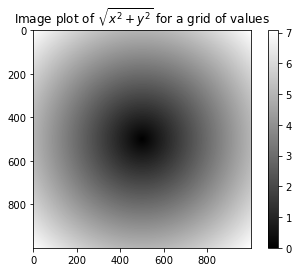

In [160]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

### Expressing Conditional Logic as Array Operations

The `numpy.where` function is a vectorized version of the ternary expression x if condition else y. Suppose we had a boolean array and two arrays of values:



In [161]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr. A list comprehension doing this might look like:

In [162]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [163]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With np.where you can write this very concisely:

In [164]:
result = np.where(cond, xarr, yarr)

In [165]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to np.where don’t need to be arrays; one or both of them can be scalars. A typical use of where in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is very easy to do with np.where:

In [166]:
arr = np.random.randn(4, 4)

In [167]:
arr > 0

array([[False, False,  True,  True],
       [ True, False, False, False],
       [False, False, False, False],
       [False,  True, False,  True]])

In [168]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [ 2, -2, -2, -2],
       [-2, -2, -2, -2],
       [-2,  2, -2,  2]])

In [169]:
np.where(arr > 0, 2, arr)

array([[-0.64444463, -0.14210221,  2.        ,  2.        ],
       [ 2.        , -0.18851412, -1.68161328, -0.34188056],
       [-0.3785717 , -0.7758746 , -0.18409243, -2.73445774],
       [-0.21934929,  2.        , -1.61658829,  2.        ]])

You can combine scalars and arrays when using np.where. For example, I can replace all positive values in arr with the constant 2 like so:

The arrays passed to np.where can be more than just equal-sized arrays or scalars.

### Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class. You can use aggregations (often called reductions) like sum, mean, and std (standard deviation) either by calling the array instance method or using the top-level NumPy function.

Here I generate some normally distributed random data and compute some aggregate statistics:

In [170]:
arr = np.random.randn(5, 4)

In [171]:
arr

array([[ 0.13418889, -0.95018031, -0.64631572,  0.16816991],
       [-0.78545014,  1.91538954, -0.75977317, -1.17056591],
       [-0.41951854, -0.63200457, -0.12843374,  0.63596615],
       [-1.112555  ,  0.95599497, -2.99176085, -0.51793297],
       [ 0.03122551,  1.63146164,  0.46033532,  1.3229239 ]])

In [172]:
arr.mean()

-0.1429417558522818

In [173]:
np.mean(arr)

-0.1429417558522818

In [174]:
np.sum(arr)

-2.8588351170456363

In [176]:
arr.sum()

-2.8588351170456363

Functions like mean and sum take an optional axis argument that computes the statistic over the given axis, resulting in an array with one fewer dimension:

In [177]:
arr.mean(axis=1)

array([-0.32353431, -0.20009992, -0.13599767, -0.91656346,  0.86148659])

In [178]:
arr.sum(axis=0)

array([-2.15210929,  2.92066126, -4.06594816,  0.43856108])

Here, `arr.mean(1)` means “compute mean across the columns” where `arr.sum(0)` means “compute sum down the rows.”

Other methods like `cumsum` and `cumprod` do not aggregate, instead producing an array of the intermediate results:

In [180]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [182]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [183]:
arr.cumprod()

array([0, 0, 0, 0, 0, 0, 0, 0])

In multidimensional arrays, accumulation functions like cumsum return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [184]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [185]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [187]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [189]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

See table for a full listing. We’ll see many examples of these methods in action in later chapters.

*Basic array statistical methods*

| Function | Description |
| :---     | :---------- |
| `sum` | Sum of all the elements in the array or along an axis; zero-length arrays have sum  |
| `mean` | Arithmetic mean; zero-length arrays have NaN mean |
| `std, var` | Standard deviation and variance, respectively, with optional degrees of freedom adjustment (default denominator n) | 
| `min, max` | Minimum and maximum | 
| `argmin, argmax` | Indices of minimum and maximum elements, respectively | 
| `cumsum` | Cumulative sum of elements starting from 0 | 
| `cumprod` | Cumulative product of elements starting from 1 |

### Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, sum is often used as a means of counting True values in a boolean array:

In [190]:
arr = np.random.randn(100)

In [192]:
(arr > 0).sum()

54

There are two additional methods, any and all, useful especially for boolean arrays. any tests whether one or more values in an array is True, while all checks if every value is True:

In [193]:
bools = np.array([False, False, True, False])

In [195]:
bools.any()

True

In [196]:
bools.all()

False

These methods also work with non-boolean arrays, where non-zero elements evaluate to True.

### Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in-place with the `sort` method:

In [197]:
arr = np.random.randn(6)

In [198]:
arr

array([ 0.24190982, -1.29120544,  0.25490099,  0.1420542 ,  1.04740658,
       -1.04638501])

In [199]:
arr.sort()

In [200]:
arr

array([-1.29120544, -1.04638501,  0.1420542 ,  0.24190982,  0.25490099,
        1.04740658])

You can sort each one-dimensional section of values in a multidimensional array in-place along an axis by passing the axis number to sort:

In [201]:
arr = np.random.randn(5, 3)

In [202]:
arr

array([[-0.56177746, -1.48407059,  0.83630836],
       [-0.61568802,  1.002129  ,  0.41178147],
       [-0.25175988, -1.81855331,  1.18499175],
       [ 0.81879104, -0.68802635, -0.33289789],
       [ 0.46712953, -1.00309294, -1.16589173]])

In [203]:
arr.sort(1)

In [204]:
arr

array([[-1.48407059, -0.56177746,  0.83630836],
       [-0.61568802,  0.41178147,  1.002129  ],
       [-1.81855331, -0.25175988,  1.18499175],
       [-0.68802635, -0.33289789,  0.81879104],
       [-1.16589173, -1.00309294,  0.46712953]])

In [207]:
arr.sort(0)

In [208]:
arr

array([[-1.81855331, -1.00309294,  0.46712953],
       [-1.48407059, -0.56177746,  0.81879104],
       [-1.16589173, -0.33289789,  0.83630836],
       [-0.68802635, -0.25175988,  1.002129  ],
       [-0.61568802,  0.41178147,  1.18499175]])

The top-level method `np.sort` returns a sorted copy of an array instead of modifying the array in-place. A quick-and-dirty way to compute the quantiles of an array is to sort it and select the value at a particular rank:

In [209]:
large_arr = np.random.randn(1000)

In [210]:
large_arr.sort()

In [211]:
large_arr[int(0.05 * len(large_arr))]

-1.6197497318924663

Several other kinds of data manipulations related to sorting (e.g., sorting a table of data by one or more columns) can also be found in pandas.

### Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is `np.unique`, which returns the sorted unique values in an array:

In [212]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [213]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [214]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [215]:
np.unique(ints)

array([1, 2, 3, 4])

Contrast np.unique with the pure Python alternative:

In [216]:
sorted(set(names))

['Bob', 'Joe', 'Will']

Another function, `np.in1d` , tests membership of the values in one array in another, returning a boolean array:

In [217]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [218]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

*Array set operations*

| Function | Description |
| :---     | :---------- |
| `unique(x)` | Compute the sorted, unique elements in x  |
| `intersect1d(x, y)` | Compute the sorted, common elements in x and y |
| `union1d(x, y)` | Compute the sorted union of elements | 
| `in1d(x, y)` | Compute a boolean array indicating whether each element of x is contained in y | 
| `setdiff1d(x, y)` | Set difference, elements in x that are not in y | 
| `setxor1d(x, y)` | Set symmetric differences; elements that are in either of the arrays, but not both |

## 4. Linear Algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other square matrix math, is an important part of any array library. Unlike some languages like MATLAB, multiplying two two-dimensional arrays with * is an element-wise product instead of a matrix dot product. Thus, there is a function dot, both an array method and a function in the numpy namespace, for matrix multiplication:

In [219]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [220]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [221]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [222]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [223]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [224]:
y.dot(x)

array([[ 98., 127., 156.],
       [ 27.,  33.,  39.],
       [ 44.,  61.,  78.]])

`x.dot(y)` is equivalent to `np.dot(x, y)`:

In [225]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array:

In [227]:
np.dot(x, np.ones(3))

array([ 6., 15.])

The @ symbol (as of Python 3.5) also works as an infix operator that performs matrix multiplication:

In [228]:
x @ np.ones(3)

array([ 6., 15.])

`numpy.linalg` has a standard set of matrix decompositions and things like inverse and determinant. These are implemented under the hood via the same industry-standard linear algebra libraries used in other languages like MATLAB and R, such as BLAS, LAPACK, or possibly (depending on your NumPy build) the proprietary Intel MKL (Math Kernel Library):

In [229]:
from numpy.linalg import inv, qr

In [230]:
X = np.random.randn(5, 5)

In [231]:
mat = X.T.dot(X)

In [232]:
inv(mat)

array([[ 2.83999332, -1.83117989,  3.81601584,  1.44300915, -3.35552864],
       [-1.83117989,  1.91614023, -1.76132568,  0.13958874,  1.00863263],
       [ 3.81601584, -1.76132568,  7.48923606,  4.18604816, -7.47489509],
       [ 1.44300915,  0.13958874,  4.18604816,  3.67316142, -5.03107831],
       [-3.35552864,  1.00863263, -7.47489509, -5.03107831,  8.18448644]])

In [233]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  2.55925680e-16,  4.38749455e-16,
        -2.26348278e-16,  2.49424121e-16],
       [ 9.13281253e-16,  1.00000000e+00,  1.26304655e-15,
         3.25661882e-16, -1.83792741e-15],
       [-8.02358662e-16,  1.64491171e-16,  1.00000000e+00,
        -2.43149179e-15,  5.89719992e-16],
       [-2.97120451e-15,  1.04503803e-16, -6.68769113e-15,
         1.00000000e+00,  4.41930034e-15],
       [ 9.21733721e-16, -1.46891857e-16, -2.46780399e-15,
         3.30906136e-15,  1.00000000e+00]])

In [234]:
q, r = qr(mat)

In [235]:
r

array([[-3.90755166, -3.05020258,  1.36721758,  0.73755634,  0.47176304],
       [ 0.        , -2.66251517, -3.24877155,  1.9480922 , -1.45476333],
       [ 0.        ,  0.        , -4.70178079, -4.98808335, -7.45122834],
       [ 0.        ,  0.        ,  0.        , -0.84222793, -0.50207789],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.07894636]])

The expression `X.T.dot(X)` computes the dot product of X with its transpose X.T.

*Commonly used numpy.linalg functions*

| Function | Description |
| :---     | :---------- |
| `diag` | Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal |
| `dot` | Matrix multiplication |
| `trace` | Compute the sum of the diagonal elements | 
| `det` | Compute the matrix determinant | 
| `eig` | Compute the eigenvalues and eigenvectors of a square matrix | 
| `inv` | Compute the inverse of a square matrix |
| `pinv` | Compute the Moore-Penrose pseudo-inverse of a matrix |
| `qr` | Compute the QR decomposition |
| `svd` | Compute the singular value decomposition (SVD) | 
| `solve` | Solve the linear system Ax = b for x, where A is a square matrix | 
| `lstsq` | Compute the least-squares solution to Ax = b | 

## 5. Pseudorandom Number Generation

The `numpy.random` module supplements the built-in Python random with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions. For example, you can get a 4 × 4 array of samples from the standard normal distribution using normal:

In [237]:
samples = np.random.normal(size=(4, 4))

In [238]:
samples

array([[-0.15994427, -1.54092648,  0.42364   ,  0.50199383],
       [-0.71073158,  1.10763384,  1.07858573, -1.64791456],
       [ 2.16655781, -0.74725684, -1.26610191, -0.51274541],
       [ 0.78580344, -0.38284426,  2.76471194, -0.51791477]])

Python’s built-in random module, by contrast, only samples one value at a time. As you can see from this benchmark, `numpy.random` is well over an order of magnitude faster for generating very large samples:

In [239]:
from random import normalvariate

In [240]:
N = 1000000

In [241]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

561 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [242]:
%timeit np.random.normal(size=N)

21.9 ms ± 916 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We say that these are pseudorandom numbers because they are generated by an algorithm with deterministic behavior based on the seed of the random number generator. You can change NumPy’s random number generation seed using np.random.seed:

In [243]:
np.random.seed(1234)

The data generation functions in `numpy.random` use a global random seed. To avoid global state, you can use `numpy.random.RandomState` to create a random number generator isolated from others:

In [244]:
rng = np.random.RandomState(1234)

In [245]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

See table for a partial list of functions available in numpy.random. I’ll give some examples of leveraging these functions’ ability to generate large arrays of samples all at once in the next section.

*Partial list of numpy.random functions*

| Function | Description |
| :---     | :---------- |
| `seed` | Seed the random number generator |
| `permutation` | Return a random permutation of a sequence, or return a permuted range |
| `shuffle` | Randomly permute a sequence in-place | 
| `rand` | Draw samples from a uniform distribution | 
| `randint` | Draw random integers from a given low-to-high range | 
| `randn` | Draw samples from a normal distribution with mean 0 and standard deviation 1 (MATLAB-like interface) |
| `binomial` | Draw samples from a binomial distribution |
| `normal` | Draw samples from a normal (Gaussian) distribution |
| `beta` | Draw samples from a beta distribution | 
| `chisquare` | Draw samples from a chi-square distribution | 
| `gamma` | Draw samples from a gamma distribution | 
| `uniform` | Draw samples from a uniform [0,1) distribution | 